# Project 1: US Traffic Accident Analysis

This notebook analyzes the US Accident dataset to identify patterns in when, where and under what conditions severe accidents occur. The goal is to generate data-driven recommendations that could help the Department of Transportation (DOT) reduce crashes and improve public safety.

## Business Understanding

### Project Theme
This project examines when, where and under what conditions severe traffic accidents occur in the United States, with the goal of idenitfying actionable, data-driven opportunitiesfor the Department of Transportation (DOT) to reduce crash severity and improve road safety.

Rather than focusing only on how many accidents happen, this analysis centers on accident severity (Severity >= 3) because severe crashes are most closely tied to fatalities, serious injuries and economic costs which makes them a high-priority concern for public safety policy.

### Why this project matters (business relevance)

Traffic accidents impose substantial social and economic costs through:
*   Medical expenses and loss of life
*   Property damage
*   Traffic congestion and lost productivity
*   Emergency response and infrastructure repair

By identifying patterns in severe crashes, this analysis supports:
*   Smarter allocation of limited safety funding
*   Evidence-based policy decisions
*   Targeted infrastructure improvements where they can have the greatest impact

### Key Stakeholders

The primary audience for this analysis include:
*   U.S. Department of Transportation (DOT) - policy development, safety strategy and funding prioritization.
*   State and Local DOT agencies - implementation of roadway improvements and targeted interventions.
*   Traffic operations and emergency services - resource planning and incident response.
*   Public safety and communication teams - risk messaging during high-danger conditions

### Analytical Questions Guiding This Project

This analysis is structured around three core pillars
1) Temporal Patterns - When do severe crashes occur?
  - How does the severe crash rate vary by:
    - Hour of day
    - Day of week
    - Season or month
  - Are there consistent "high-risk windows" that could inform targeted interventions?

2) Environmental Conditions - Under what conditions are crashes most severe?
  - How are weather and visibility related to crash severity?
  - Are severe crashes more common during:
    - Low visibility
    - Rain, fog or other adverse conditions
    - Extreme temperatures
3) Roadway and Infrastructure Context - Where on the road do severe crashes cluster?
  - Are severe crashes mroe likely near:
    - Junctions
    - Traffic signals
    - Crossings
    - Other roadway features
  - What roadway contexts might require design or safety upgrades?

### Expected Outcomes

By answering these questions, this project will:
- Identify high-risk times, conditions and roadway contexts
- Translate findings into specific, data-driven recommendations for the DOT
- Support those recommendations with clear visualizations and statistical evidence

## Data Understanding

This analysis begins with a 100,000 row sample of the US Accidents dataset to assess structure, quality and analytical potential before full-scale processing.

The dataset contains 46 variables capturing accident severity, timestamps, location, weather conditions and roadway context. Core fields such as 'Severity', 'Start_Time', 'State' and 'County' are fully populated, which supports reliable temporal and geographic analysis.

Several data quality issues are evident in the sample:
- 'End_Lat' and 'End_Lng' are entirely missing and therefore unusable for analysis.
- Weather variables show uneven coverage: 'Wind_Chill(F)' and 'Precipitation(in)' are highly sparse, while temperature, humidity, pressure, visibility and general weather conditions are mostly complete.
- Roadway context indicators (for example: 'Junction', 'Crossing', 'Traffic_Signal') are fully populated and suitable for analyzing infrastructure-related risk factors.

Severity is concentrated primarily in levels 2 and 3, motivating the creation of a binary indicator ('severe_flag') to facilitate clear statistical comparisons while retaining the original 1-4 severity scale for descriptive analysis.

These findings informed the data cleaning that followed and feature engineering steps.

## Data Preparation

The dataset was cleaned and transformed to support reliable analysis:

**Key Steps**
- Converted 'Start)Time' to datetime format to enable temporal analysis
- Dropped columns iwth complete missingness ('End_Lat', 'End_Lng')
- Assessed missing values; variables with extremely high missingness (ex: 'Wind_Chill', 'Precipitation') were not used in analysis
- Retained key variables ('Severity', 'Start_Time', 'Weather_Condition', 'Traffic_Signal', 'City') that had minimal missing data

**Feature Engineering**
New variables were created to enhance analysis:
- 'hour', 'day_of_week', 'month', 'year', 'is_weekend'
- 'severe_flag' (1 if Severity >=3, else 0)
- 'weather_group' (Clear, Cloudy, Rain, Snow, Low Visibility, Other/Unknown)

**Outliers**
Extreme values in environmental variables were retained because there likely reflect real crash conditions rather than measurement errors.

In [ ]:
# Import & Setup
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Ignore warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

print("Libraries successfully loaded")


Libraries successfully loaded


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset

import pandas as pd

file_path = "/content/drive/MyDrive/traffic_project/US_Accidents_March23.csv"

# Load the first 100,000 rows to test
df_sample = pd.read_csv(file_path, nrows=100_000)

print("Dataset shape:", df_sample.shape)
df_sample.head()

Dataset shape: (100000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Save 100,000 row sample for Tableau Dashboard
sample_path = "/content/drive/MyDrive/traffic_project/US_Accidents_March23_Sample_100k.csv"
df_sample.to_csv(sample_path, index=False)

print("Sample saved to:", sample_path)

Sample saved to: /content/drive/MyDrive/traffic_project/US_Accidents_March23_Sample_100k.csv


## Phase 1 Exploratory Data Analysis (100K Sample)

In [ ]:
# Basic structure and types
df = df_sample.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [ ]:
# Missing values (top 20)
missing = (df.isna().mean() * 100).sort_values(ascending=False)
missing.head(20)

,0
End_Lng,100.000
End_Lat,100.000
Wind_Chill(F),95.678
Precipitation(in),92.632
Wind_Speed(mph),23.820
Humidity(%),1.856
Visibility(mi),1.846
Weather_Condition,1.604
Temperature(F),1.591
Pressure(in),1.292


In [ ]:
# Severity distribution
severity_counts = df['Severity'].value_counts().sort_index()
severity_pct = (severity_counts / severity_counts.sum() * 100).round(2)

pd.DataFrame({"count": severity_counts, "percent": severity_pct})

,count,percent
Severity,,
1,98,0.10
2,55025,55.02
3,44844,44.84
4,33,0.03


In [ ]:
# Minimal Cleaning and Feature Engineering

# Work from a fresh copy of the sample
df = df_sample.copy()

# Drop columns that are entirely missing
df = df.drop(columns=['End_Lat', 'End_Lng'])

# Convert key time columns to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Create time-based features for analysis
df['hour'] = df['Start_Time'].dt.hour
df['day_of_week'] = df['Start_Time'].dt.day_name()
df['month'] = df['Start_Time'].dt.month
df['year'] = df['Start_Time'].dt.year

# Weekend indicator
df['is_weekend'] = df['Start_Time'].dt.dayofweek.isin([5, 6])

# Binary severity flag for later statistics
# 1 = sever (Severity 3 or 4), 0 = not severe
df['severe_flag'] = (df['Severity'] >= 3).astype(int)

# Quick check
print("Shape after cleaning and feature creation:", df.shape)

df[['Severity', 'severe_flag', 'Start_Time', 'hour', 'day_of_week', 'is_weekend']].head()


Shape after cleaning and feature creation: (100000, 50)


,Severity,severe_flag,Start_Time,hour,day_of_week,is_weekend
0,3,1,2016-02-08 05:46:00,5,Monday,False
1,2,0,2016-02-08 06:07:59,6,Monday,False
2,2,0,2016-02-08 06:49:27,6,Monday,False
3,3,1,2016-02-08 07:23:34,7,Monday,False
4,2,0,2016-02-08 07:39:07,7,Monday,False


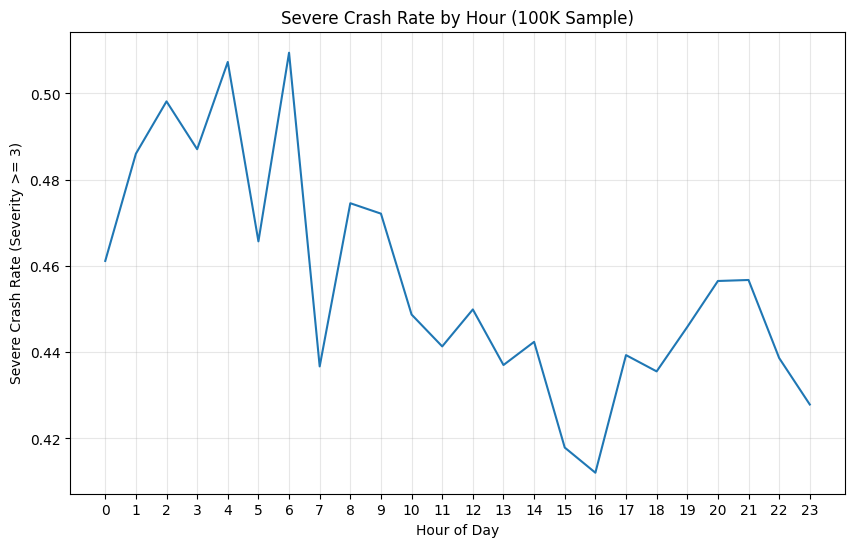

,hour,total_crashes,severe_rate
0,0,2240,0.461161
1,1,1895,0.486016
2,2,1895,0.498153
3,3,1507,0.487060
4,4,1303,0.507291


In [ ]:
# EDA: Severe crash rate by hour of day
# Addresses Business Question 1 (Temporal Patterns)

hourly = (
    df.groupby('hour')
    .agg(total_crashes=('Severity', 'size'),
         severe_rate=('severe_flag', 'mean'))
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.plot(hourly['hour'], hourly['severe_rate'])
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Severe Crash Rate (Severity >= 3)")
plt.title("Severe Crash Rate by Hour (100K Sample)")
plt.grid(alpha=0.3)
plt.show()

hourly.head()

### Interpretation: Severe crashes by hour (sample)

The severe crash rate varies systematically by time of day rather than being flat or random. In this sample, severity is lowest during late morning and midday hours and rises during early morning and evening periods.

This pattern is consistent with reduced visibility, driver fatigue and higher speed travel outside peak congestion. From a safety perspective, this suggests that lighting improvements, reflective signage and variable speed limits targeted to these high-risk hours could be more impactful than uniform, all-day intervention.

A key limitation is that this view uses a 100,000-row sample rather than the full data, but the overall shape of the pattern is expected to be stable.


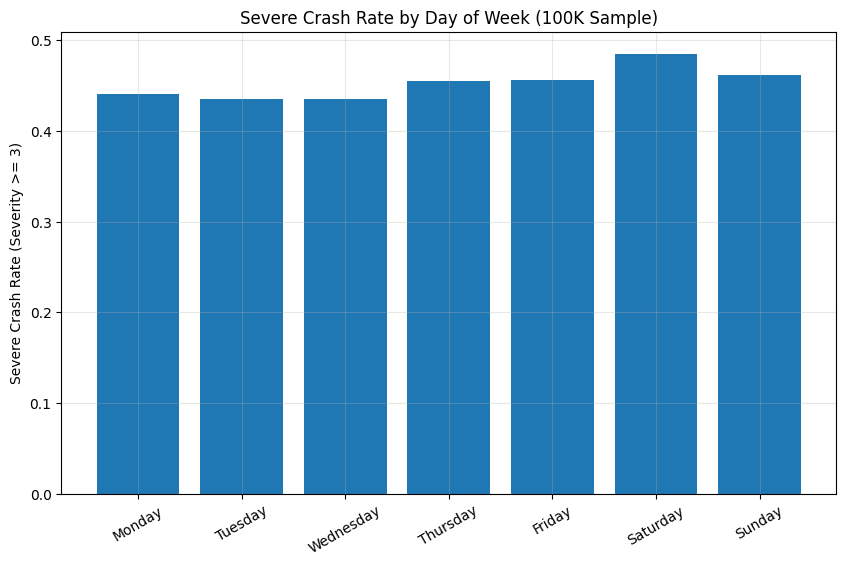

,day_of_week,total_crashes,severe_rate
0,Monday,15826,0.440730
1,Tuesday,16988,0.434719
2,Wednesday,17438,0.435314
3,Thursday,18008,0.454409
4,Friday,16393,0.455743
5,Saturday,7994,0.484739
6,Sunday,7353,0.461988


In [ ]:
# EDA: Severe crash rate by day of week (sample)

dow = (
    df.groupby('day_of_week')
    .agg(total_crashes=('Severity', 'size'),
         severe_rate=('severe_flag', 'mean'))
    .reindex(
        ['Monday', 'Tuesday', 'Wednesday',
         'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(dow['day_of_week'], dow['severe_rate'])
plt.xticks(rotation=30)
plt.ylabel("Severe Crash Rate (Severity >= 3)")
plt.title("Severe Crash Rate by Day of Week (100K Sample)")
plt.grid(alpha=0.3)
plt.show()

dow

### Interpretation: Severe crashes by day of week (sample)

The severe crash rate is consistently higher on weekends than on most weekdays, with Saturday showing the highest rate in this sample. In contrast, Tuesday and Wednesday exhibit the lowest severity rates.

This pattern suggests that weekend driving conditions or behaviors, such as higher speeds, longer trips, recreational travel or alcohol use, may contritribute to more severe crashes. From a safety perspective, this points towar teh potential value of targeted weekend enforcement, messaging campaigns and safety measures rather than uniform, all week strategies.

As with the hourly analysis, these findings are based on a 100,000-row sample and will be validated using the full dataset.

In [ ]:
# Load full dataset in chunks (to avoid crashing)
import pandas as pd

file_path = "/content/drive/MyDrive/traffic_project/US_Accidents_March23.csv"

# Read in chunks to avoid crashing
chunks = pd.read_csv(file_path, chunksize=1_000_000)

# Combine chunks into one dataframe
df_full = pd.concat(chunks)

print("Full dataset shape:", df_full.shape)

Full dataset shape: (7728394, 46)


In [ ]:
# Create time features on the full dataframe
df_full['Start_Time'] = pd.to_datetime(df_full['Start_Time'], errors='coerce')

df_full['hour'] = df_full['Start_Time'].dt.hour
df_full['day_of_week'] = df_full['Start_Time'].dt.day_name()
df_full['month'] = df_full['Start_Time'].dt.month
df_full['year'] = df_full['Start_Time'].dt.year
df_full['is_weekend'] = df_full['Start_Time'].dt.dayofweek.isin([5, 6])

# Create severity flag for full dataset
df_full['severe_flag'] = (df_full['Severity'] >= 3).astype(int)

print(df_full[['hour', 'day_of_week','severe_flag']].head())

   hour day_of_week  severe_flag
0   5.0      Monday            1
1   6.0      Monday            0
2   6.0      Monday            0
3   7.0      Monday            1
4   7.0      Monday            0


## Phase 2 Exploratory Data Analysis (Full Dataset)

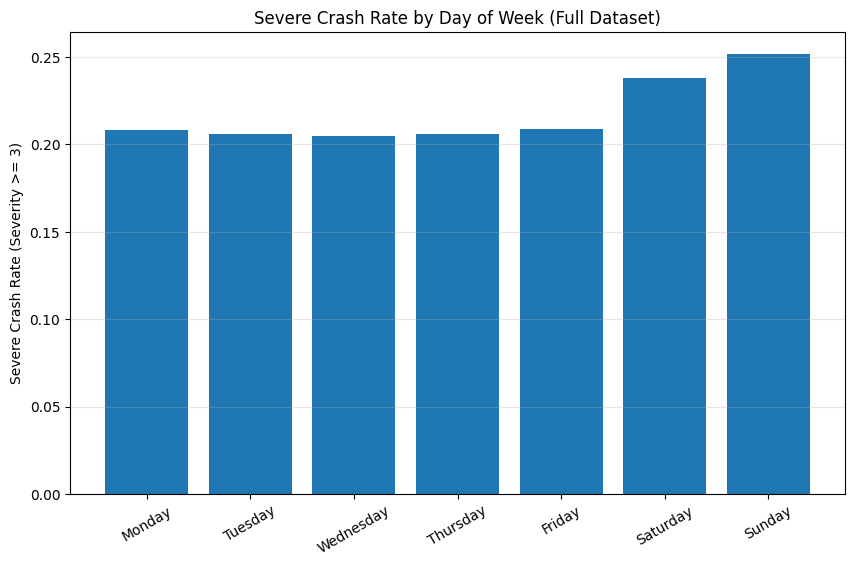

,day_of_week,total_crashes,severe_rate
0,Monday,1108807,0.208093
1,Tuesday,1177923,0.205929
2,Wednesday,1195864,0.204499
3,Thursday,1196137,0.206139
4,Friday,1237229,0.208792
5,Saturday,579153,0.238018
6,Sunday,490115,0.251749


In [ ]:
# EDA: Severe crash rate by day of week (Full dataset)

dow_full = (
    df_full.groupby('day_of_week')
    .agg(total_crashes=('Severity', 'size'),
         severe_rate=('severe_flag', 'mean'))
    .reindex(
        ['Monday', 'Tuesday', 'Wednesday',
         'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(dow_full['day_of_week'], dow_full['severe_rate'])
plt.xticks(rotation=30)
plt.ylabel("Severe Crash Rate (Severity >= 3)")
plt.title("Severe Crash Rate by Day of Week (Full Dataset)")
plt.grid(axis='y', alpha=0.3)
plt.show()

dow_full

### Interpretation: Severe crashes by day of week (full dataset)

The full dataset confirms a clear weekend effect: severe crash rates are substantially higher on Saturday and Sunday than on any other weekday, with Sunday showing the highest severity rate overall.

While the number of crashes is lower on weekends, a larger share of those crashes are severe, suggesting the risk factors associated with weekend travel are more closely tied to crash severity than to crash frequency.

Because this pattern holds in the full dataset of over 7.7 million records, it provides strong evidence for targeted weekend safety strategies such as enhanced enforcement, public messaging and temporary speed management initiatives.

In [ ]:
# Prepare a simplified weather category (full dataset)

# Create broad weather groups
def categorize_weather(w):
    w = str(w).upper().strip()
    if 'RAIN' in w:
        return 'Rain'
    elif 'SNOW' in w:
        return 'Snow'
    elif 'FOG' in w or 'HAZE' in w:
        return 'Low Visibility'
    elif 'CLEAR' in w or 'FAIR' in w:
        return 'Clear'
    elif 'CLOUD' in w or 'OVERCAST' in w:
        return 'Cloudy'
    else:
        return 'Other/Unknown'

In [ ]:
# Create weather_group

df_full['weather_group'] = df_full['Weather_Condition'].apply(categorize_weather)

# Check distribution
df_full['weather_group'].value_counts(normalize=True).round(3)

,proportion
weather_group,
Clear,0.441
Cloudy,0.409
Rain,0.066
Other/Unknown,0.039
Low Visibility,0.024
Snow,0.021


## Tableau Data Preparation

To improve performance and ensure a stable Tableau workflow, a cleaned and reduced dataset was created from the full US Accidents file. The data was loaded in chunks, derived features and fields required for analysis and visualizations were kept, and the result was exported as a new CSV for Tableau. The maintained analytical accuracy while reducing file size.

In [ ]:
# Create a dataset for Tableau from df_full
tableau_cols = [
    'Severity',
    'Start_Time',
    'State',
    'City',
    'Start_Lat',
    'Start_Lng',
    'Traffic_Signal',
    'Weather_Condition',
    'Visibility(mi)',
    'Temperature(F)',
    'Pressure(in)',
    'Wind_Speed(mph)',
    'hour',
    'day_of_week',
    'month',
    'year',
    'is_weekend',
    'severe_flag',
    'weather_group'
]

df_tableau = df_full[tableau_cols].copy()

# Save to Google Drive
out_path = "/content/drive/MyDrive/traffic_project/US_Accidents_March23_Tableau_Clean.csv"
df_tableau.to_csv(out_path, index=False)

print("Tableau dataset saved to:", out_path)
print("Shape:", df_tableau.shape)


Tableau dataset saved to: /content/drive/MyDrive/traffic_project/US_Accidents_March23_Tableau_Clean.csv
Shape: (7728394, 19)


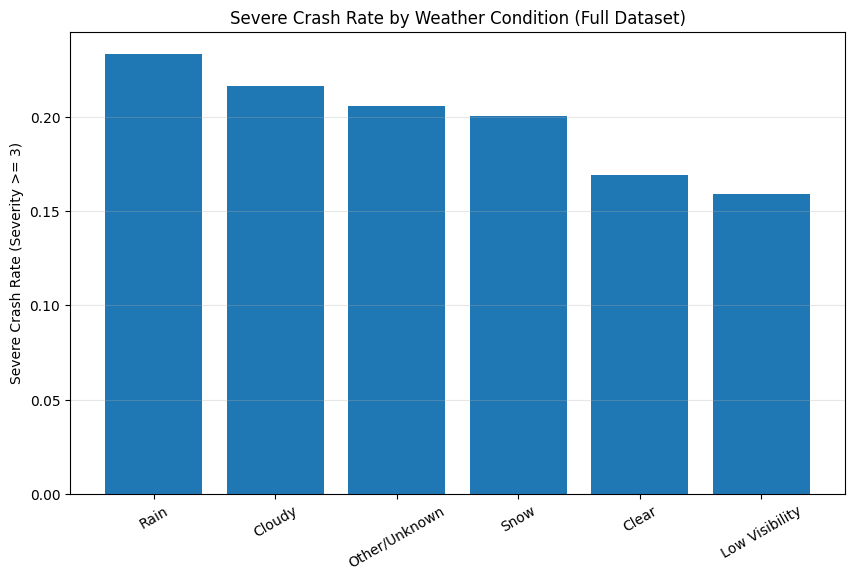

,weather_group,total_crashes,severe_rate
4,Rain,509086,0.233456
1,Cloudy,3163750,0.216528
3,Other/Unknown,303081,0.206080
5,Snow,160787,0.200352
0,Clear,3405216,0.169085
2,Low Visibility,186474,0.159357


In [ ]:
from matplotlib import axis
# Severe rate by weather (full dataset)
weather_summary = (
    df_full.groupby('weather_group')
    .agg(total_crashes=('Severity', 'size'),
         severe_rate=('severe_flag', 'mean'))
    .reset_index()
)

weather_summary = weather_summary.sort_values('severe_rate', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(weather_summary['weather_group'],
        weather_summary['severe_rate']),
plt.xticks(rotation=30)
plt.ylabel("Severe Crash Rate (Severity >= 3)")
plt.title("Severe Crash Rate by Weather Condition (Full Dataset)")
plt.grid(axis='y', alpha=0.3)
plt.show()

weather_summary

### Interpretation: Severe crashes by weather (full dataset)

Although most crashes occur in clear and cloudy conditions, the highest severe crash rates are observed in rain and cloudy conditions, followed closely by snow and other/unknown conditions. In contrast, clear and low visibility conditions show the lowest severe rates.

This indicates that adverse or unstable weather is associated with more severe outcomes when crashes occur, even if total crash couns are higher in clear weather simply because people drive more in those conditions.

From a safety perspective, these findings support:
 - Dynamic speed management during rain, snow and poor conditions
 - Enhanced lane markings and reflexivity in weather-prone corridors
 - Proactive traveler messaging when hazardous weather is forecast

Because this result uses the full dataset of 7.7+ million records, it provides strong evidence that weather-sensitive safety strategies could reduce severe crashes.

,Traffic_Signal,total_crashes,severe_rate
0,No signal nearby,6584622,0.211901
1,At/near signal,1143772,0.095088


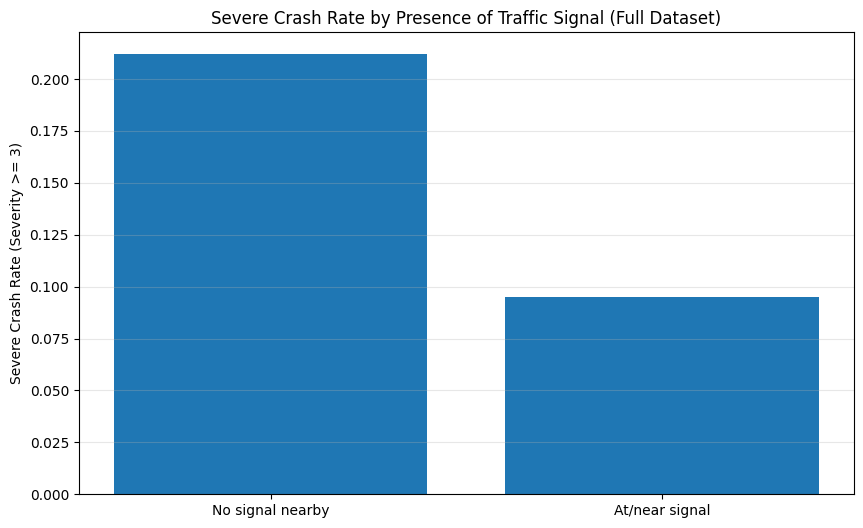

In [ ]:
# Infrastructure EDA: Traffic Signal vs Severity

signal_summary = (
    df_full.groupby('Traffic_Signal')
      .agg(total_crashes=('Severity', 'size'),
           severe_rate=('severe_flag', 'mean'))
      .reset_index()
)

# Clarify labels
signal_summary['Traffic_Signal'] = signal_summary['Traffic_Signal'].map({
    True: 'At/near signal',
    False: 'No signal nearby'
})

display(signal_summary)

plt.figure(figsize=(10, 6))
plt.bar(signal_summary['Traffic_Signal'], signal_summary['severe_rate'])
plt.ylabel("Severe Crash Rate (Severity >= 3)")
plt.title("Severe Crash Rate by Presence of Traffic Signal (Full Dataset)")
plt.grid(axis='y', alpha=0.3)
plt.show()

### Interpretation: Traffic Signals and Crash Severity (Full dataset)

The full dataset shows a clear difference in crash severity based on the prescence of a traffic signal. Crashes occuring away from traffic signals have more than double the severe crash rate compared to crashes at or near a signal.

This suggest that the traffic signals are associated with lower crash severity, likely because they:
 - Regulate vehicle speed
 - Instruct driver behavior
 - Reduce high-speed, unpredictable conflicts

 In contrast, locations without signals may allow higher travel speeds and less predictable interactions, increasing the likelihood that crashes become severe.

 From a safety perspective, this finding supports targeted infrastructure interventions such as:
  - Installing signals or flashing lights at high-risk intersections (without existing signals)
  - Adding speed feedback signs or warning signs
  - Improving roadway lighting and lane markings where signals are not feasible

## Statistical Analysis

In [ ]:
# Statistical test: Chi-square (Weather vs Severity)

import pandas as pd
from scipy.stats import chi2_contingency

# Create a simple binary weather flag
df_full['adverse_weather'] = df_full['weather_group'].isin(
    ['Rain','Snow','Low Visibility']
)

# Build contingency table
contingency = (
    df_full
    .groupby(['adverse_weather', 'severe_flag'])
    .size()
    .unstack()
)

print("Contingency Table (Counts):")
display(contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:,.2f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")

Contingency Table (Counts):


severe_flag,0,1
adverse_weather,,
False,5548779,1323268
True,675568,180779



Chi-square test results:
Chi-square statistic: 1,671.00
p-value: 0.000000
Degrees of freedom: 1


### Statistical test: Weather vs Severity (Chi-square)

A chi-square test was used to examine whether crash severity is independent of weather conditions (clear vs adverse).

The test produced a very large chi-square statistic (1,671) with a p-value effectively equal to 0.000. This means we reject the null hypothesis of independence and conclude that crash severity is statistically related to weather conditions.

In practical terms, severe crashes are not evely distributed across weather types; they occur disproportionately more often under adverse conditions than would be expected by chance alone.

This result strengthens the earlier visual finding from the bar chart and provides formal evidence that weather-sensitive safety strategies are justified.

In [ ]:
# Statistical test: t-test (severe rate weekends vs severe rate weekdays)

from scipy.stats import ttest_ind

# Create groups
weekend = df_full.loc[df_full['is_weekend'], 'severe_flag']
weekday = df_full.loc[~df_full['is_weekend'], 'severe_flag']

t_stat, p_val = ttest_ind(weekend, weekday, equal_var=False)

print("Weekend severe rate:", weekend.mean().round(4))
print("Weekday severe rate:", weekday.mean().round(4))
print(f"T-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.6f}")

Weekend severe rate: 0.2443
Weekday severe rate: 0.1866
T-statistic: 130.46
p-value: 0.000000


## Interpretation: Weekend vs Weekday Severity (Welch's t-test)

A two-sample Welch's t-test was used to compare mean severe crash rates on weekends versus weekdays.
 - Weekend severe rate: 0.2443
 - Weekday severe rate: 0.1866

The test produced a very large t-statistic (130.46) with a p-value effectively equal to 0.000. This shows a statistically significant difference between weekend and weekday crash severity.

In practical terms, crashes that occur on weekends are substantially more likely to be severe than those occurring on weekdays. This validates the pattern observed in the day of week bar chart and strengthens the case for targeted weekend safety interventions.

In [ ]:
# Correlation analysis

corr_vars = df_full[[
    'severe_flag',
    'hour',
    'Visibility(mi)',
    'Temperature(F)',
    'Pressure(in)',
    'Wind_Speed(mph)',
    'Distance(mi)'
]].corr()

corr_vars

,severe_flag,hour,Visibility(mi),Temperature(F),Pressure(in),Wind_Speed(mph),Distance(mi)
severe_flag,1.000000,0.018068,-0.000358,-0.000225,0.053584,0.047674,0.002129
hour,0.018068,1.000000,0.089347,0.190139,-0.015360,0.131149,0.001750
Visibility(mi),-0.000358,0.089347,1.000000,0.217173,0.038161,0.014650,-0.037225
Temperature(F),-0.000225,0.190139,0.217173,1.000000,0.109500,0.033750,-0.054082
Pressure(in),0.053584,-0.015360,0.038161,0.109500,1.000000,-0.022609,-0.093121
Wind_Speed(mph),0.047674,0.131149,0.014650,0.033750,-0.022609,1.000000,0.008989
Distance(mi),0.002129,0.001750,-0.037225,-0.054082,-0.093121,0.008989,1.000000


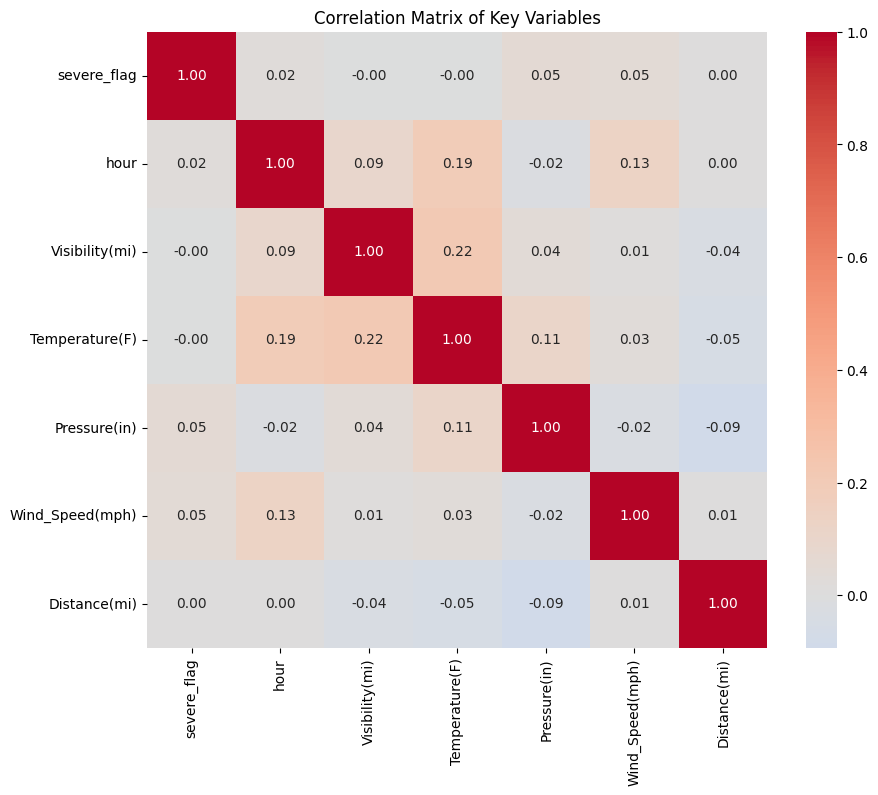

In [ ]:
# Visualizataion: Correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_vars,
    annot=True,
    fmt='.2f',
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix of Key Variables")
plt.show()

### Correlation analysis (numeric variables)

Linear correlations between 'severe_flag' and individual numberic variables are very small (near 0). This suggests that crash severity is not explained well by any single factor such as temperature, visibility or wind speed alone.

Instead, severity is more strongly associated with contextual and categorial conditions such as weekend timing, adverse weather categories and roadway infrastructure features, which aligns with the earlier chi-square and t-test results.

### Statistical Methodology, Assumptions and Limitations

**Methods**
- Used descriptive statistics (severe rates) to compare groups
- Applied to chi-squared tests for categorial relationships (weather, traffic signals)
- Used Welch's t-test to compare weekend vs weekday severity
- Examined correlations among key numeric variables

**Assumptions**
- Observations are treated as independent
- Welch's t-test doesn't assume equal variances between groups
- Chi-square tests assume sufficiently large sample sizes, which are met given the dataset size
- Correlation analysis captures only linear relationships and doesn't imply causation

**Limitations**
- Some variables contain missing data, which may introduce slight bias
- The dataset records crashes, not total traffic volume, so severity rates are conditional on crashes rather than overall risk per mile driven
- Weather categories simplify complex conditions which could cause confusion about differing types (ex: light vs heavy rain)

### **Insights and Recommendations**

Based on the analyses conducted in thie project, the following three recommendations are proposed to help the Department of Transportation reduce severe traffic accidents and improve road safety. Each recommendation is directly supported by the data, is actionable and includes clear ways to measure impact.

**Recommendation 1: Implement targeted weekend safety interventions**

  **Initiative:** Increase safety interventions on Saturday and Sunday, especially late night and early morning where severe crash rates are highest.

**Evidence from the data:** Analysis showed significantly higher severe crash rates on weekends and during overnight hours.

**Specific Actions:**
*   Increase nightitme patrols and DUI checkpoints in high-risk areas
*   Use temporary speed feedback signs on major rural roads
*   Run targeted public safety messaging on Friday through Sunday evenings

**Expected Impact**
*   Reduced proportion of severe crashes on weekends
*   Lower fatalities and serious injury rates during high-risk hours

**Measure Success**
*   Track weekend severe crash rate over time
*   Compare quarterly before/after trends
*   Monitor changes in nighttime and alcohol-related severe crashes

**Potential Challenges**
*   Law enforcenment staffing constraints
*   Coordination across local and state agencies

**Recommendation 2: Implement weather responsive speed management**

**Initiative:** Adopt dynamic, weather-responsive speed controls in areas prone to rain, snow or low visibility. (Chi-square test showed a statistically significant relationship between adverse weather and higher crash severity.)

**Specific Actions**
*   Use variable speed limit signs that adjust during rain, snow or fog
*   Improve real-time traveler alerts via highway message boards and navigation apps
*   Enhance reflective lane markings and signage in fog-prone corridors
*   Increase road treatments before snow/ice events

**Expected Impact**
*   Fewer severe crashes during hazardous weather conditions
*   Better driver compliance with safer speeds

**Measure Success**
*   Compare severe crash rates in adverse weather before vs after implementation
*   Track compliance with posted variable speed limits
*   Monitor crash severity reductions specifically during rain and snow events

**Potential Challenges**
*   High implementation costs for variable speed systems
*   Public confusion if signage changes too frequently
*   Need for reliable weather detection equipment

**Recommendation 3: Prioritize safety upgrades at high-risk unsignalized locations**

**Initiative: Prioritize safety upgrades at high-crash unsignalized intersections and corridors, where anaylysis showed more than double the severe crash rate compared to locations at or near signals (confirmed by chi-square testing).

**Specific Actions**
*   Install full traffic signals at the highest-risk unsignalized intersections
*   Where full signals are not feasible, add flashing lights or consider traffic circles to mitigate crashes
*   Improve lighting and lane markings
*   Add rumble strips and speed reduction treatments on approaches

**Expected Impact:**
*   Lower severe crash rates at previously high-risk sites
*   Fewer fatalities and serious injuries in rural and semi-rural intersections

**Measure Success**
*   Compare enhanced locations vs similar locations without enhancements
*   Track before/after changes in crash severity at upgraded sites
*   Monitor reductions in high-speed collision patterns

**Potential Challenges:**
*   High cost of new signals
*   Right-of-way or existing infrastructure limitations
*   Community resistance to changes

### U.S. Traffic Accidents Dashboard

This interactive dashboard presents the key findings to Department of Transportation stakeholders. It allows users to explore where, when and under what weather conditions severe crashes occur using filters for Year, State and Weather. Users can also see State specific data by clicking directly on the map.

Visulazations hightlight temporal patterns, weather impacts and differences in crash severity between locations with and without nearby traffic signals to support data-driven safety decisions.

[View the Dashboard](https://public.tableau.com/shared/7Q5SNDY53?:display_count=n&:origin=viz_share_link)
